<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/leaderboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
 
 
!pip install kaggle
import pandas as pd
from numpy import isnan
import datetime
import seaborn as sns
import os
 
#Kaggle->My Account (click en) 'Create New API Token' para conseguir las credenciales a poner
 
# Credenciales aqui:
os.environ['KAGGLE_USERNAME'] = "axelmpm"              #PROBA Y SI NO ANDA PONE EL TUYO
os.environ['KAGGLE_KEY'] = "2aa3a5bc197073e6a62b928e1e201e69"                   #PROBA Y SI NO ANDA PONE EL TUYO

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
sns.set(rc = {'figure.figsize':(20,5)})

# Aca podes subir al colab o usar tus credenciales arriba para cargar la data

In [ ]:
# OPCION CARGAR LA DATA DESDE KAGGLE PONIENDO CREDENCIALES (no olvidarse de quitarlas antes de irse)

!kaggle competitions leaderboard --download nlp-getting-started
!unzip nlp-getting-started.zip -d leaderboard
leaderboard = pd.read_csv("leaderboard/nlp-getting-started-publicleaderboard.csv")

100% 57.9k/57.9k [00:00<00:00, 526kB/s]

Archive:  nlp-getting-started.zip
  inflating: leaderboard/nlp-getting-started-publicleaderboard.csv  


In [ ]:
# OPCION CARGAR LA DATA DESDE EL LEADERBOARD DE KAGGLE (boton de Raw Data en kaggle)
#leaderboard = pd.read_csv("nlp-getting-started-publicleaderboard.csv")

In [ ]:
leaderboard['SubmissionDate'] = leaderboard['SubmissionDate'].astype('datetime64')

# AGREGA TU NOMBRE DE GRUPO ACA (si queres)

In [ ]:
# En nombre_en_kaggle se agregan los grupos que no pudieron ser encontrados en piazza
# y que a ojo se encontraron en kaggle

nombre_en_kaggle = [
    'NaN',               
    'COVIgData-19',
    'COVIDATOS' ,
    'fiuba_barros_gomez', 
    'Data Science Monsters',
    'Tomas Sabao',
    'Grupo 1 - King Data',
    'Lucio López Lecube',
    'Maximiliano Petrucci',
    'Niko Farfan',
    'Ariel Vergara',
    'Grupo python fiuba',
    'El tio del marido de Pampita',
    'Barbijo de Uranio',
    'Grupo 33 - DataTravellers',
    'El Cuarteto Imperial',
    'Grupo Rosa',
    'Aprendices de Oogway',
    'Daniela Carrero',
    'How I Met Your Data',
    'Datavid-20'
]

In [ ]:
piazza = [
 'King Data',
 'How i met your data',
 'Datavid-19',
 'Coronapandas',
 'El tío del marido de Pampita',
 'El cuarteto imperial',
 'Equipo Cloud',
 'Superficial Intelligence',
 'DataDevs',
 'The Datalorian',
 'Corona2',
 'Les chiques super poderoses',
 'CuarenData 2.0',
 'Pyrañas',
 'Grupo Phyton Fiuba',
 'Grupo rosa',
 'DATAVID-20',
 'Grupo con barbijo',
 'Grupo 13',
 'AlphaZero',
 'undefined',
 'Barbijo De Uranio',
 'COVIgData -19',
 'ChocoTeam',
 'El Cuarteto del Code',
 'DatUs',
 'covidatos',
 'Grupo Orga Datos',
 'DataSOS',
 'DataTravellers',
 'CoronaDatos',
 'Data hunters',
 'DTS: DaTa Science',
 'Rest Driven Development',
 'Unidos por los datos',
 'Here we go again',
 'Undefined',
 'Los últimos',
 'Team_Undav',
 'DelLejanoOeste',
 'Kung Fu Panda',
 'Grupo - AVV',
 'El Jabalí Salvaje',
 'Oyentes en cuarentena 2020.',
 'Los Oyentes 700',
 'Oh La La, Data',
 'Belu +3',
 'Grupo Random',
 'DATA',
 'El gato de Turing',
 'ECONOSDATA',
 'marte',
 'Los aprendices de Oogway',
 'GMC',
 'Zumba',
 'Datos al alcance',
 'Reykjavik',
 'Reinventadas',
 '3Sigma',
 'Grupo Rocket Cósmico',
 'NameError',
 'Daiana Vega']
len(piazza)

62

# Creando el leaderboard

In [ ]:
cross = leaderboard[leaderboard['TeamName'].isin(piazza + nombre_en_kaggle)]
aux = cross\
    .groupby('TeamName')\
    .apply(lambda x: x.nlargest(2, 'SubmissionDate'))\
    .reset_index(drop=True)
aux['last_plus'] = -aux.groupby('TeamName')['Score'].diff().shift(-1)
datos_leaderboard = aux.groupby('TeamName')['SubmissionDate'].max().to_frame().merge(aux, on = 'SubmissionDate')
submits_record = cross.groupby('TeamName')['SubmissionDate'].count().rename('cantidad_submits_record')
datos_leaderboard = submits_record.to_frame().merge(datos_leaderboard, on = 'TeamName')
datos_leaderboard = datos_leaderboard.sort_values('Score', ascending = False).reset_index()
mean = datos_leaderboard['Score'].mean()
datos_leaderboard['relative'] = (datos_leaderboard['Score'] - mean) * 100
datos_leaderboard.rename(columns={'SubmissionDate':'last_record_submission_date'}, inplace=True)
datos_leaderboard['rank'] = datos_leaderboard.index + 1
datos_leaderboard.set_index('rank', inplace = True)
datos_leaderboard = datos_leaderboard[['TeamName','Score','last_plus','relative','last_record_submission_date','cantidad_submits_record']]

# Leaderboard Orga de Datos

In [ ]:
datos_leaderboard

,TeamName,Score,last_plus,relative,last_record_submission_date,cantidad_submits_record
rank,,,,,,
1,Grupo python fiuba,0.84891,0.00245,4.104432,2020-08-03 22:11:20,11
2,Superficial Intelligence,0.84768,0.00276,3.981432,2020-08-03 16:12:02,14
3,Datavid-20,0.84400,0.00613,3.613432,2020-08-03 20:49:17,8
4,El Cuarteto Imperial,0.84339,0.00276,3.552432,2020-08-03 02:27:42,19
5,COVIgData-19,0.83879,0.00766,3.092432,2020-07-22 22:44:01,8
6,How I Met Your Data,0.83665,0.00766,2.878432,2020-08-03 17:34:08,4
7,Corona2,0.83604,0.02759,2.817432,2020-08-01 02:24:42,8
8,DatUs,0.83420,0.00307,2.633432,2020-08-02 12:31:17,24
9,Aprendices de Oogway,0.83205,0.00092,2.418432,2020-08-01 20:16:34,16


# En que anduvieron los demas teams?

In [ ]:
datos_leaderboard.sort_values('last_record_submission_date', ascending = False)[['TeamName','last_record_submission_date','last_plus','Score']]

,TeamName,last_record_submission_date,last_plus,Score
rank,,,,
1,Grupo python fiuba,2020-08-03 22:11:20,0.00245,0.84891
3,Datavid-20,2020-08-03 20:49:17,0.00613,0.84400
6,How I Met Your Data,2020-08-03 17:34:08,0.00766,0.83665
2,Superficial Intelligence,2020-08-03 16:12:02,0.00276,0.84768
16,Grupo 33 - DataTravellers,2020-08-03 14:20:00,0.00675,0.81428
22,Equipo Cloud,2020-08-03 02:47:00,0.00215,0.80570
4,El Cuarteto Imperial,2020-08-03 02:27:42,0.00276,0.84339
15,Grupo 13,2020-08-03 01:55:02,0.00031,0.81918
14,Grupo 1 - King Data,2020-08-03 01:32:13,0.01655,0.82194


# Submits record por dia

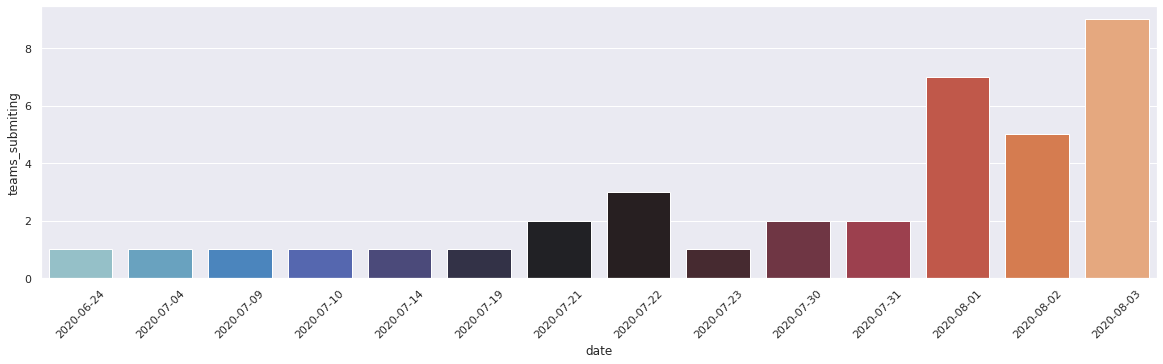

In [ ]:
datos_leaderboard_with_date = datos_leaderboard.copy()
datos_leaderboard_with_date['date'] = datos_leaderboard['last_record_submission_date'].apply(lambda x: datetime.date(x.year, x.month, x.day))
submits_per_day = datos_leaderboard_with_date.groupby('date')['TeamName'].count().to_frame().reset_index()\
                                    .rename(columns = {'TeamName':'teams_submiting'})

v = sns.barplot(x = 'date', y = 'teams_submiting', data = submits_per_day, palette = 'icefire')
for item in v.get_xticklabels():
        item.set_rotation(45)

# Podes ver el progreso del team que quieras


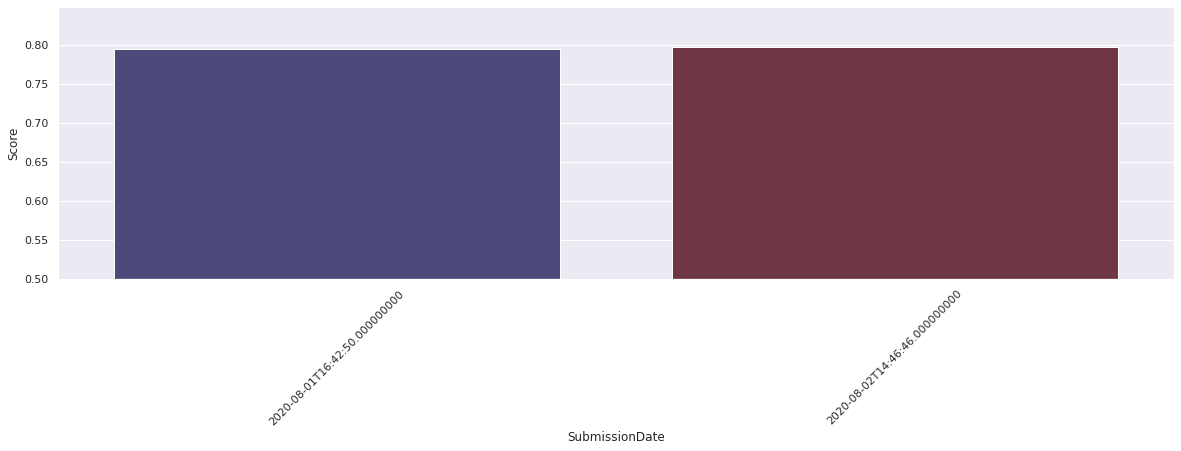

In [ ]:
teamName = 'Undefined' #pone tu grupo

v = sns.barplot(x = 'SubmissionDate', y = 'Score', data = leaderboard[ leaderboard['TeamName'] == teamName ], palette = 'icefire')
v.set(ylim=(0.5, datos_leaderboard['Score'].max()))
for item in v.get_xticklabels():
        item.set_rotation(45)